# Analyzing Credit Card Customer Churn Behaviour 
**Problem Statement:** A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is considering leaving the bank so they can proactively go to the customer to provide them better services and reverse the customers' decision in their favour.

**Data Source and Description:**
- https://leaps.analyttica.com/sample_cases/11
- https://www.kaggle.com/sakshigoyal7/credit-card-customers

The dataset consists of records of 10,127 bank customers (rows) and 20 columns describing various features viz.- 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'. We have both categorical as well as numerical features. We select the best of these features and model customer attrition behaviour using these features. Such a prediction system can act as an early warning system for the bank and incentivize them to do the needful to retain customers.

**Columns:**

- **Clientnum**	Num	Client number. Unique identifier for the customer holding the account
- **Attrition_Flag**	char	Internal event (customer activity) variable
- **Customer_Age**	Num	Demographic variable - Customer's Age in Years
- **Gender**	Char	Demographic variable - M=Male, F=Female
- **Dependent_count**	Num	Demographic variable - Number of people dependents
- **Education_Level**	Char	Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
- **Marital_Status**	Char	Demographic variable - Married, Single, Unknown
- **Income_Category**	Char	Demographic variable - Annual Income Category of the account holder (< 40K, 40K - 60K, 60K - 80K, 80K-120K, > 120K, Unknown)
- **Card_Category**	Char	Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
- **Months_on_book**	Num	Months on book (Time of Relationship)
- **Total_Relationship_Count**	Num	Total no. of products held by the customer
- **Months_Inactive_12_mon**	Num	No. of months inactive in the last 12 months
- **Contacts_Count_12_mon**	Num	No. of Contacts in the last 12 months
- **Credit_Limit**	Num	Credit Limit on the Credit Card
- **Total_Revolving_Bal**	Num	Total Revolving Balance on the Credit Card
- **Avg_Open_To_Buy	Num**	Open to Buy Credit Line (Average of last 12 months)
- **Total_Amt_Chng_Q4_Q1**	Num	Change in Transaction Amount (Q4 over Q1) 
- **Total_Trans_Amt	Num**	Total Transaction Amount (Last 12 months)
- **Total_Trans_Ct	Num**	Total Transaction Count (Last 12 months)
- **Total_Ct_Chng_Q4_Q1**	Num	Change in Transaction Count (Q4 over Q1) 
- **Avg_Utilization_Ratio**	Num	Average Card Utilization Ratio


## Index:
1. Exploratory Data Analysis and Visualizations
2. Outlier Management
3. Correlation heatmap and multicollinearity 
4. Feature Selection and further preprocessing 
5. Balancing the data (we note that only 1624 of the 10,127 customers end up leaving the bank, such an imbalance can affect classification models adversely)
6. Model Creation and Training (Ours is a binary classification problem)
    - Decision Tree Classifier 
    - Random Forest Classifier
    - Gradient Boost Classifier 
    - K Nearest Neighbor Classifier
7. Evaluation Metrics 
8. Insights and Conclusion
9. References

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics  import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
import imblearn

In [3]:
df = pd.read_csv('BankChurners.csv')
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
        'CLIENTNUM'], axis = 1, inplace = True)
df.to_csv('bank_churners.csv')
print(df.shape)
df.head()

(10127, 20)


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


-----------------------------------------------------------------

# Exploratory Data Analysis
- Duplicate rows 
- Outliers
- Null values 
- Correlations
- Ditributions and Visualizations

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [6]:
df.isnull().sum() 

# no null values 

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
df.duplicated().sum() 

# no duplicate rows 

0

#### The dataset is free from missing values and duplicate rows.

In [8]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [9]:
df = df.rename(columns = {'Attrition_Flag': 'att', 
                          'Customer_Age': 'age', 'Gender': 'gender', 'Dependent_count': 'dep',
                          'Education_Level': 'edu', 'Marital_Status': 'marital', 'Income_Category': 'income', 
                          'Card_Category': 'card','Months_on_book': 'book_months', 
                          'Total_Relationship_Count': 'rel', 'Months_Inactive_12_mon': 'inactive',
                          'Contacts_Count_12_mon': 'contacts', 'Credit_Limit': 'credit_limit', 
                          'Total_Revolving_Bal': 'rev_bal', 'Avg_Open_To_Buy': 'buy', 
                          'Total_Amt_Chng_Q4_Q1': 'amt_change', 'Total_Trans_Amt': 'trans_amt',
                          'Total_Trans_Ct': 'trans_count', 'Total_Ct_Chng_Q4_Q1': 'trans_count_change', 
                          'Avg_Utilization_Ratio': 'util'})
df.columns

,att,age,gender,dep,edu,marital,income,card,book_months,rel,inactive,contacts,credit_limit,rev_bal,buy,amt_change,trans_amt,trans_count,trans_count_change,util
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [10]:
catcols= []
numcols = []
for column in df.columns:
    if df[column].dtype == 'object':
        catcols.append(column)
    elif df[column].dtype in ['int64', 'float64']:
        numcols.append(column)

print(catcols)
print("Number of categorical columns: ", len(catcols))
print()
print(numcols)
print("Number of categorical columns: ", len(numcols))

['att', 'gender', 'edu', 'marital', 'income', 'card']
Number of categorical columns:  6

['age', 'dep', 'book_months', 'rel', 'inactive', 'contacts', 'credit_limit', 'rev_bal', 'buy', 'amt_change', 'trans_amt', 'trans_count', 'trans_count_change', 'util']
Number of categorical columns:  14


---------------------------------------------

## Categorical Variables 
- Nominal: Gender, Marital, att   ---- will need one hot encoding
- Ordinal: Education, Income, Card 

                    att
Existing Customer  8500
Attrited Customer  1627
---------
   gender
F    5358
M    4769
---------
                edu
Graduate       3128
High School    2013
Unknown        1519
Uneducated     1487
College        1013
Post-Graduate   516
Doctorate       451
---------
          marital
Married      4687
Single       3943
Unknown       749
Divorced      748
---------
                income
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
---------
          card
Blue      9436
Silver     555
Gold       116
Platinum    20
---------


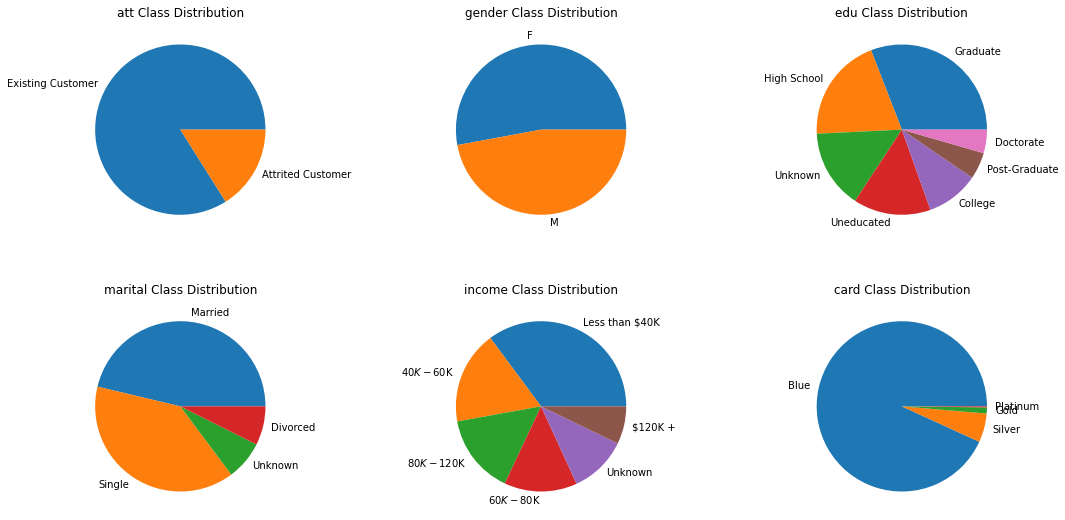

In [11]:
c = 1
plt.subplots(figsize=(17, 17))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.5, 
                    wspace=0.4, 
                    hspace = 0.3)
for column in catcols:
    counts = df[column].value_counts()
    print(pd.DataFrame(counts))
    plt.subplot(2, 3, c)
    plt.pie(df[column].value_counts(), labels = counts.index)
    plt.title(f'{column} Class Distribution')
    print("---------")
    c = c+1

plt.show()

In [12]:
for column in catcols:
    print(df.groupby(column).att.value_counts())
    print('------------------------------------------')
    
# we note that we have only 20 records for platinum card owners 

att                att              
Attrited Customer  Attrited Customer    1627
Existing Customer  Existing Customer    8500
Name: att, dtype: int64
------------------------------------------
gender  att              
F       Existing Customer    4428
        Attrited Customer     930
M       Existing Customer    4072
        Attrited Customer     697
Name: att, dtype: int64
------------------------------------------
edu            att              
College        Existing Customer     859
               Attrited Customer     154
Doctorate      Existing Customer     356
               Attrited Customer      95
Graduate       Existing Customer    2641
               Attrited Customer     487
High School    Existing Customer    1707
               Attrited Customer     306
Post-Graduate  Existing Customer     424
               Attrited Customer      92
Uneducated     Existing Customer    1250
               Attrited Customer     237
Unknown        Existing Customer    1263
           

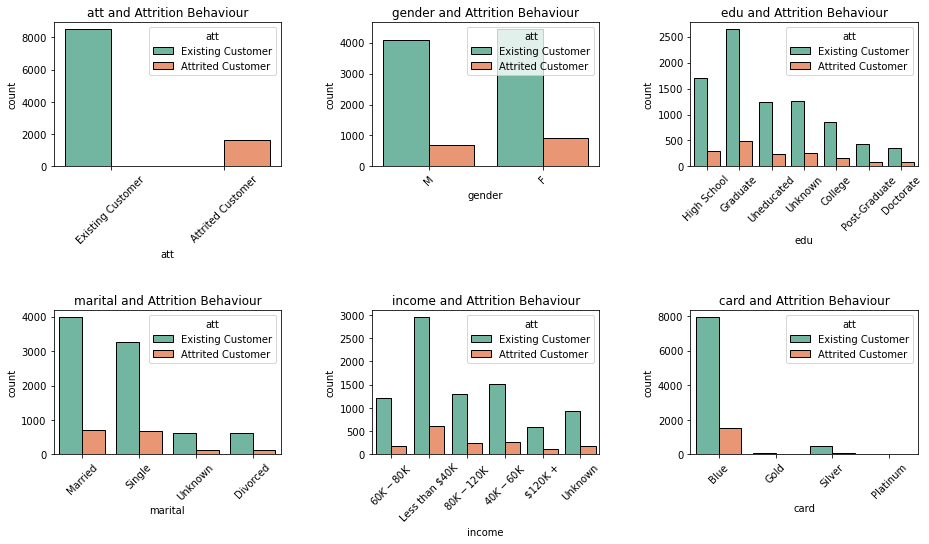

In [13]:
c = 1
plt.subplots(figsize=(15, 15))
plt.subplots_adjust(left = 0.1,
                    bottom = 0.1, 
                    right = 0.9, 
                    top = 0.5, 
                    wspace = 0.4, 
                    hspace = 1.0) # space between rows 
for column in catcols:
    plt.subplot(2, 3, c)
    figure = sns.countplot(x = df[column], hue = df['att'], edgecolor = 'black', palette = "Set2")
    figure.set_xticklabels(labels = figure.get_xticklabels(), rotation=45)
    c = c+1
    plt.title(f'{column} and Attrition Behaviour')
    
plt.show()

In [14]:
# label encoding nominal variables, these will require one hot encoding 
le = {}
for column in ['att', 'gender', 'marital']: 
    le[f'le_{column}'] = LabelEncoder()
    labels = le[f'le_{column}'].fit_transform(df[column])
    df.insert(df.columns.get_loc(column) + 1, f'{column}_l', labels)
print(le) # dictionary: le contains all the fitted encoders
df.head()
# dictionary of already fit label encoders, can be used to transform user input while deploying 

{'le_att': LabelEncoder(), 'le_gender': LabelEncoder(), 'le_marital': LabelEncoder()}


,att,att_l,age,gender,gender_l,dep,edu,marital,marital_l,income,...,inactive,contacts,credit_limit,rev_bal,buy,amt_change,trans_amt,trans_count,trans_count_change,util
0,Existing Customer,1,45,M,1,3,High School,Married,1,$60K - $80K,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,1,49,F,0,5,Graduate,Single,2,Less than $40K,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,1,51,M,1,3,Graduate,Married,1,$80K - $120K,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,1,40,F,0,4,High School,Unknown,3,Less than $40K,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,1,40,M,1,3,Uneducated,Married,1,$60K - $80K,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [15]:
catcols

['att', 'gender', 'edu', 'marital', 'income', 'card']

In [18]:
df.card.value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: card, dtype: int64

In [23]:
# labels for ordinal features (could not use LabelEncoder since these variables are ordinal)
edu_l = []
income_l = []
card_l = []

for i, data in df.iterrows():
    if data['edu'] == 'Unknown':
        edu_l.append(0)
    if data['edu'] == 'Uneducated':
        edu_l.append(1)
    if data['edu'] == 'High School':
        edu_l.append(2)
    if data['edu'] == 'College':
        edu_l.append(3)
    if data['edu'] == 'Graduate':
        edu_l.append(4)
    if data['edu'] == 'Post-Graduate':
        edu_l.append(5)
    if data['edu'] == 'Doctorate':
        edu_l.append(6)
        
    if data['income'] == 'Unknown':
        income_l.append(0)
    if data['income'] == 'Less than $40K':
        income_l.append(1)
    if data['income'] == '$40K - $60K':
        income_l.append(2)
    if data['income'] == '$60K - $80K':
        income_l.append(3)
    if data['income'] == '$80K - $120K':
        income_l.append(4)
    if data['income'] == '$120K +':
        income_l.append(5)
        
    if data['card'] == 'Blue':
        card_l.append(0)
    if data['card'] == 'Silver':
        card_l.append(1)
    if data['card'] == 'Gold':
        card_l.append(2)
    if data['card'] == 'Platinum':
        card_l.append(3)

In [28]:
df.insert(df.columns.get_loc('edu') + 1, 'edu_l', edu_l)
df.insert(df.columns.get_loc('income') + 1, 'income_l', income_l)
df.insert(df.columns.get_loc('card') + 1, 'card_l', card_l)
df.columns

Index(['att', 'att_l', 'age', 'gender', 'gender_l', 'dep', 'edu', 'edu_l',
       'marital', 'marital_l', 'income', 'income_l', 'card', 'card_l',
       'book_months', 'rel', 'inactive', 'contacts', 'credit_limit', 'rev_bal',
       'buy', 'amt_change', 'trans_amt', 'trans_count', 'trans_count_change',
       'util'],
      dtype='object')

In [29]:
for column in catcols:
    print(df[column].value_counts())
    print(df[f'{column}_l'].value_counts())
    print("---------------------------")

Existing Customer    8500
Attrited Customer    1627
Name: att, dtype: int64
1    8500
0    1627
Name: att_l, dtype: int64
---------------------------
F    5358
M    4769
Name: gender, dtype: int64
0    5358
1    4769
Name: gender_l, dtype: int64
---------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: edu, dtype: int64
4    3128
2    2013
0    1519
1    1487
3    1013
5     516
6     451
Name: edu_l, dtype: int64
---------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: marital, dtype: int64
1    4687
2    3943
3     749
0     748
Name: marital_l, dtype: int64
---------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: income, dtype: int64
1    3561
2    1790
4    1535
3    1402
0    1112
5     727
Name:

In [34]:
df.to_csv('df1.csv', index = False)

---------------------------------------------

## Numerical Variables 

In [30]:
# Computing variances 
for column in numcols:
    print(f'{column} variance: ', df[column].var())

age variance:  64.26930723247591
dep variance:  1.6871628988519742
book_months variance:  63.7828458100154
rel variance:  2.416183811827244
inactive variance:  1.0213576342059132
contacts variance:  1.2237340661998037
credit_limit variance:  82605860.99764086
rev_bal variance:  664204.356594701
buy variance:  82640559.6541551
amt_change variance:  0.04805160767656245
trans_amt variance:  11540487.165373318
trans_count variance:  550.9615634942085
trans_count_change variance:  0.05668498688619787
util variance:  0.07600578621854333


In [31]:
df[numcols].describe()

,age,dep,book_months,rel,inactive,contacts,credit_limit,rev_bal,buy,amt_change,trans_amt,trans_count,trans_count_change,util
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## Detecting and treating outliers

In [49]:
def outlier(column):
    
    # distribution
    sns.histplot(df[column])
    plt.show()
    
    # boxplot
    sns.boxplot(df[column])
    plt.show()
    
    print('max: ', df[column].max())
    print('min: ', df[column].min())

    print('Mean: ', df[column].mean())
    print()
    
    print('IQR STRATEGY ------------')
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    r_whisker = Q3 + 1.5*IQR
    l_whisker = Q1 - 1.5 * IQR
    outsIQR = df[(df[column] > r_whisker) | (df[column] < l_whisker)] 
    
    print('Q1: ', Q1)
    print('Q2 (median): ', df[column].median())
    print('Q3: ', Q3)

    print('Left whisker: ', l_whisker)
    print('Right whisker: ', r_whisker)
    
    # Quantile Strategy
    print()
    print('QUANTILE STRATEGY ------------')
    max_val = df[column].quantile(0.95)       
    min_val = df[column].quantile(0.05)           

    outsQ = df[(df[column] < min_val) | (df[column] > max_val)]
    
    print('95th percentile: ', max_val)
    print('5th percentile: ', min_val)

    ###########
    print( )
    print(f'(IQR Strategy) NUMBER OF OUTLIERS DETECTED IN THE {column} COLUMN: {len(outsIQR)}')
    print(f"(Quantile Strategy) NUMBER OF OUTLIERS DETECTED IN {column} COLUMN:", outsQ.shape[0])

## Age:

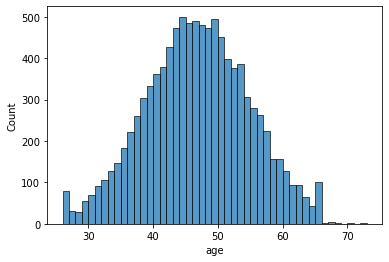

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


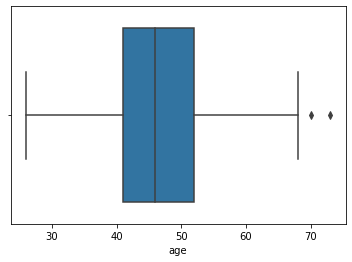

max:  73
min:  26
Mean:  46.32596030413745

IQR STRATEGY ------------
Q1:  41.0
Q2 (median):  46.0
Q3:  52.0
Left whisker:  24.5
Right whisker:  68.5

QUANTILE STRATEGY ------------
95th percentile:  60.0
5th percentile:  33.0

(IQR Strategy) NUMBER OF OUTLIERS DETECTED IN THE age COLUMN: 2
(Quantile Strategy) NUMBER OF OUTLIERS DETECTED IN age COLUMN: 867


In [51]:
outlier('age')

### Since the IQR strategy gives smaller number of outliers, hence we conclude that the age column has 2 outliers 

In [52]:
# dealing with outliers: since 70 and 73 are not too different from the right whisker, we equate them
for i, data in df.iterrows():
    if data.age > 68.5:
        df.at[i, 'age'] = 68.5

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

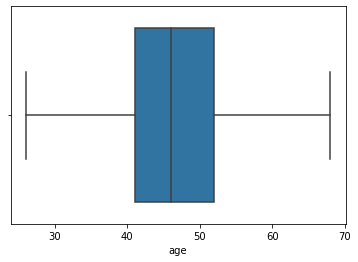

In [53]:
sns.boxplot(df.age) # all clean

## dep: number of people dependent on the customer 

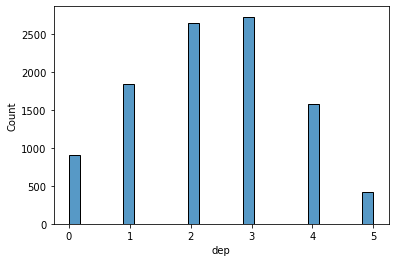

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


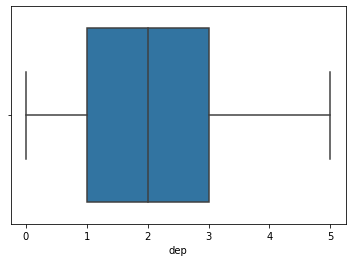

max:  5
min:  0
Mean:  2.3462032191172115

IQR STRATEGY ------------
Q1:  1.0
Q2 (median):  2.0
Q3:  3.0
Left whisker:  -2.0
Right whisker:  6.0

QUANTILE STRATEGY ------------
95th percentile:  4.0
5th percentile:  0.0

(IQR Strategy) NUMBER OF OUTLIERS DETECTED IN THE dep COLUMN: 0
(Quantile Strategy) NUMBER OF OUTLIERS DETECTED IN dep COLUMN: 424


In [78]:
outlier('dep')

## book_months: time on books in months 
How long a person has been a customer of the bank in months

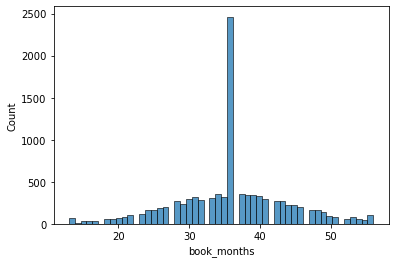

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


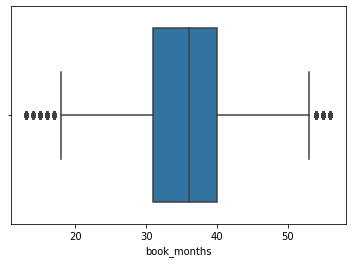

max:  56
min:  13
Mean:  35.928409203120374

IQR STRATEGY ------------
Q1:  31.0
Q2 (median):  36.0
Q3:  40.0
Left whisker:  17.5
Right whisker:  53.5

QUANTILE STRATEGY ------------
95th percentile:  50.0
5th percentile:  22.0

(IQR Strategy) NUMBER OF OUTLIERS DETECTED IN THE book_months COLUMN: 386
(Quantile Strategy) NUMBER OF OUTLIERS DETECTED IN book_months COLUMN: 884


In [55]:
outlier('book_months')

### Since the IQR strategy gives smaller number of outliers, hence we conclude that the age column has 386 outliers 

In [56]:
df.book_months.std()

7.986416330871776

In [57]:
print(df[df.book_months < 17.5].book_months.describe()) # outliers on the left
print(df[df.book_months > 53.5].book_months.describe()) # outliers on the right 

# we note than both sets of outliers less than the left whisker and greater than the right whisker have a difference of at most only 3.5 months, hence
# we choose to equate them with their nearest whisker values

count    188.000000
mean      14.739362
std        1.582371
min       13.000000
25%       13.000000
50%       15.000000
75%       16.000000
max       17.000000
Name: book_months, dtype: float64
count    198.000000
mean      55.252525
std        0.853103
min       54.000000
25%       54.000000
50%       56.000000
75%       56.000000
max       56.000000
Name: book_months, dtype: float64


In [58]:
df[(df.book_months > 17.5) | (df.book_months < 53.5)].age.mean()

46.325269082650344

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='book_months'>

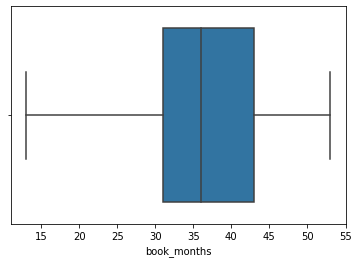

In [59]:
for i, data in df.iterrows():
    if data.age < 17.5:
        df.at[i, 'book_months'] = 17.5
    elif data.age > 53.5:
        df.at[i, 'book_months'] = 53.5
sns.boxplot(df.book_months)

## rel: total relationship count (total number of products held by the customer)

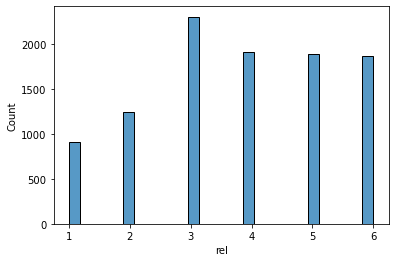

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


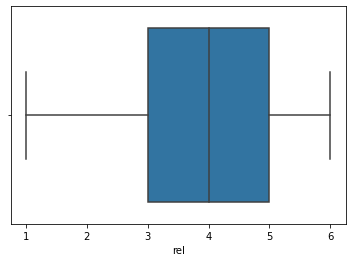

max:  6
min:  1
Mean:  3.8125802310654686

IQR STRATEGY ------------
Q1:  3.0
Q2 (median):  4.0
Q3:  5.0
Left whisker:  0.0
Right whisker:  8.0

QUANTILE STRATEGY ------------
95th percentile:  6.0
5th percentile:  1.0

(IQR Strategy) NUMBER OF OUTLIERS DETECTED IN THE rel COLUMN: 0
(Quantile Strategy) NUMBER OF OUTLIERS DETECTED IN rel COLUMN: 0


In [79]:
outlier('rel')

## inactive: Number of months the customer was inactive in the last 12 months 

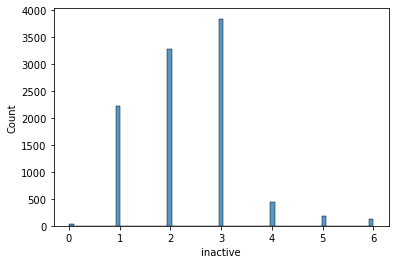

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


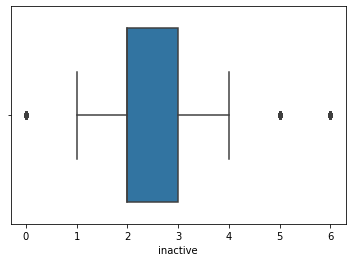

max:  6
min:  0
Mean:  2.3411671768539546

IQR STRATEGY ------------
Q1:  2.0
Q2 (median):  2.0
Q3:  3.0
Left whisker:  0.5
Right whisker:  4.5

QUANTILE STRATEGY ------------
95th percentile:  4.0
5th percentile:  1.0

(IQR Strategy) NUMBER OF OUTLIERS DETECTED IN THE inactive COLUMN: 331
(Quantile Strategy) NUMBER OF OUTLIERS DETECTED IN inactive COLUMN: 331


In [80]:
outlier('inactive')

In [102]:
for i, data in df.iterrows():
    if data.inactive < 1:
        df.at[i, 'inactive'] = 1
    elif data.inactive > 4:
        df.at[i, 'inactive'] = 4

## Contacts: number of contacts the customer had with the bank in the last 12 months 

In [98]:
df.contacts.value_counts()

3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: contacts, dtype: int64

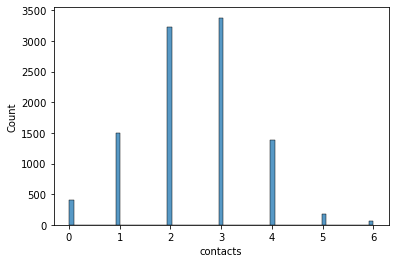

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


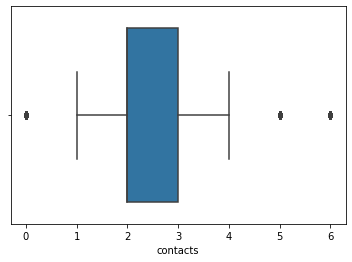

max:  6
min:  0
Mean:  2.4553174681544387

IQR STRATEGY ------------
Q1:  2.0
Q2 (median):  2.0
Q3:  3.0
Left whisker:  0.5
Right whisker:  4.5

QUANTILE STRATEGY ------------
95th percentile:  4.0
5th percentile:  1.0

(IQR Strategy) NUMBER OF OUTLIERS DETECTED IN THE contacts COLUMN: 629
(Quantile Strategy) NUMBER OF OUTLIERS DETECTED IN contacts COLUMN: 629


In [95]:
outlier('contacts')

In [100]:
for i, data in df.iterrows():
    if data.contacts < 1:
        df.at[i, 'contacts'] = 1
    elif data.contacts > 4:
        df.at[i, 'contacts'] = 4

## Credit Limit 

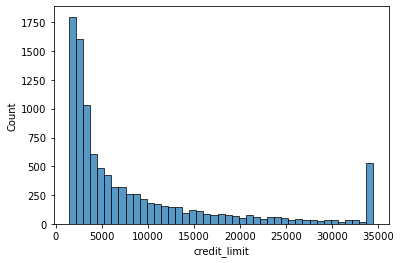

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


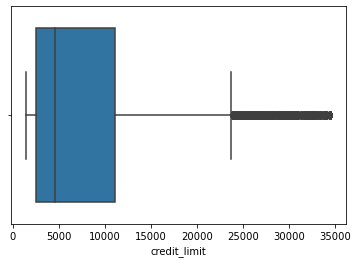

max:  34516.0
min:  1438.3
Mean:  8631.953698034848

IQR STRATEGY ------------
Q1:  2555.0
Q2 (median):  4549.0
Q3:  11067.5
Left whisker:  -10213.75
Right whisker:  23836.25

QUANTILE STRATEGY ------------
95th percentile:  34516.0
5th percentile:  1438.51

(IQR Strategy) NUMBER OF OUTLIERS DETECTED IN THE credit_limit COLUMN: 984
(Quantile Strategy) NUMBER OF OUTLIERS DETECTED IN credit_limit COLUMN: 507


In [60]:
outlier('credit_limit')

### Since the quantile strategy gives smaller number of outliers, hence we conclude that the credit_limit column has 507 outliers 

In [61]:
df[(df.credit_limit < 1438.52) | (df.credit_limit > 34516.0)].credit_limit.describe()

count    5.070000e+02
mean     1.438300e+03
std      7.283144e-12
min      1.438300e+03
25%      1.438300e+03
50%      1.438300e+03
75%      1.438300e+03
max      1.438300e+03
Name: credit_limit, dtype: float64

In [62]:
# Replacing outlier values with the 5th percentile value
for i, data in df.iterrows():
    if data['credit_limit'] < 1438.51:
        df.at[i, 'credit_limit'] = 1438.51

# Revolving Balance: total revolving balance on the credit card

In credit card terms, a revolving balance is the portion of credit card spending that goes unpaid at the end of a billing cycle. The amount can vary, going up or down depending on the amount borrowed and the amount repaid. If you revolve a balance — that is, not pay it off at the end of the month — the lender will charge you for the privilege of borrowing their money. The amount of the charge for revolving a balance will depend on the size of the balance and the interest rate of the card. When the balance is paid off, the customer is no longer revolving the debt.

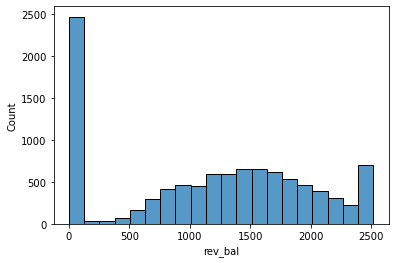

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


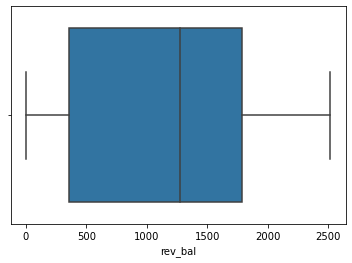

max:  2517
min:  0
Mean:  1162.8140614199665

IQR STRATEGY ------------
Q1:  359.0
Q2 (median):  1276.0
Q3:  1784.0
Left whisker:  -1778.5
Right whisker:  3921.5

QUANTILE STRATEGY ------------
95th percentile:  2517.0
5th percentile:  0.0

(IQR Strategy) NUMBER OF OUTLIERS DETECTED IN THE rev_bal COLUMN: 0
(Quantile Strategy) NUMBER OF OUTLIERS DETECTED IN rev_bal COLUMN: 0


In [64]:
outlier('rev_bal') # no outliers 

## Buy: open to buy credit line in the last 12 months: credit_limit - rev_bal

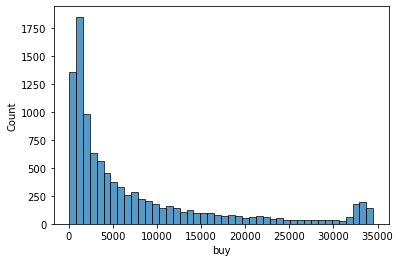

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


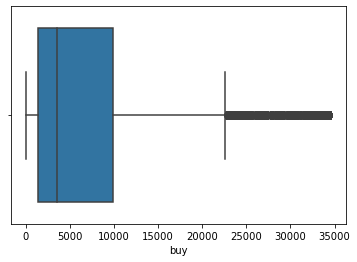

max:  34516.0
min:  3.0
Mean:  7469.139636614887

IQR STRATEGY ------------
Q1:  1324.5
Q2 (median):  3474.0
Q3:  9859.0
Left whisker:  -11477.25
Right whisker:  22660.75

QUANTILE STRATEGY ------------
95th percentile:  32183.399999999998
5th percentile:  480.3

(IQR Strategy) NUMBER OF OUTLIERS DETECTED IN THE buy COLUMN: 963
(Quantile Strategy) NUMBER OF OUTLIERS DETECTED IN buy COLUMN: 1014


In [65]:
outlier('buy')

### Since the IQR strategy gives smaller number of outliers, hence we conclude that the 'buy' column has 963 outliers 

In [66]:
df[df.buy > 22660.75].buy.describe() # outliers on the right, that is, points greater than the right whisker value

count      963.000000
mean     30531.662513
std       3650.608893
min      22664.000000
25%      27709.000000
50%      32329.000000
75%      33256.500000
max      34516.000000
Name: buy, dtype: float64

In [105]:
df[df.buy > 27709].buy.describe()

count      722.000000
mean     32398.023546
std       1777.605202
min      27710.000000
25%      31999.000000
50%      32853.000000
75%      33511.250000
max      34516.000000
Name: buy, dtype: float64

## amt_change: Change in Transaction Amount (Q4 over Q1) 

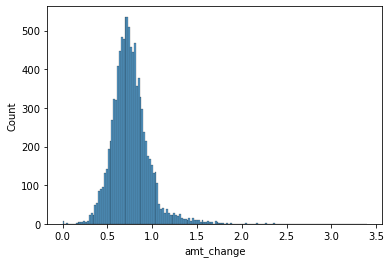

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


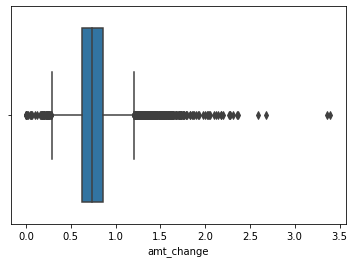

max:  3.397
min:  0.0
Mean:  0.7599406536980376

IQR STRATEGY ------------
Q1:  0.631
Q2 (median):  0.736
Q3:  0.8590000000000001
Left whisker:  0.28899999999999987
Right whisker:  1.2010000000000003

QUANTILE STRATEGY ------------
95th percentile:  1.103
5th percentile:  0.46299999999999997

(IQR Strategy) NUMBER OF OUTLIERS DETECTED IN THE amt_change COLUMN: 395
(Quantile Strategy) NUMBER OF OUTLIERS DETECTED IN amt_change COLUMN: 1006


In [106]:
outlier('amt_change')

In [107]:
df[df.amt_change > 1.2].amt_change.describe()

count    350.000000
mean       1.464049
std        0.290201
min        1.201000
25%        1.276000
50%        1.373000
75%        1.553750
max        3.397000
Name: amt_change, dtype: float64

In [108]:
df[df.amt_change > 1.55].amt_change.describe()

count    89.000000
mean      1.835135
std       0.346375
min       1.553000
25%       1.621000
50%       1.707000
75%       1.932000
max       3.397000
Name: amt_change, dtype: float64

In [109]:
# dropping amt_change values beyond 1.55 
df.drop(index = df[df.amt_change > 1.55].index, inplace = True)
df.shape

(10038, 26)

In [113]:
df[df.amt_change < 0.289].amt_change.describe() 
# we note that these outlier values are not greatly different than the lower whisker, hence we equate them to the loer whisker 

count    47.000000
mean      0.173149
std       0.092935
min       0.000000
25%       0.110500
50%       0.202000
75%       0.241500
max       0.280000
Name: amt_change, dtype: float64

In [114]:
# equating amt_change values beyond 1.2 (right whisker) and less than 1.55 -- 261 values 
for i, data in df.iterrows():
    if data['amt_change'] > 1.2:
        df.at[i, 'amt_change'] = 1.2
    if data['amt_change'] < 0.289:
        df.at[i, 'amt_change'] = 0.289

## Trans_amt: total amount in transactions in the last 12 months

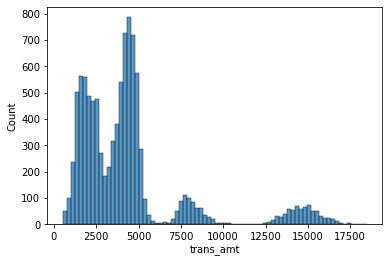

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


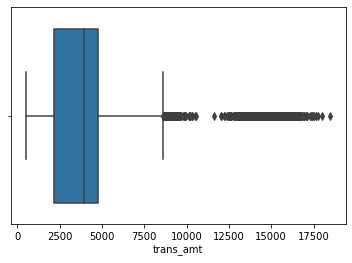

max:  18484
min:  510
Mean:  4425.29348475792

IQR STRATEGY ------------
Q1:  2170.0
Q2 (median):  3914.5
Q3:  4750.0
Left whisker:  -1700.0
Right whisker:  8620.0

QUANTILE STRATEGY ------------
95th percentile:  14220.0
5th percentile:  1283.0

(IQR Strategy) NUMBER OF OUTLIERS DETECTED IN THE trans_amt COLUMN: 895
(Quantile Strategy) NUMBER OF OUTLIERS DETECTED IN trans_amt COLUMN: 1001


In [120]:
outlier('trans_amt')

In [121]:
df[df.trans_amt > 8619.25].trans_amt.describe()

count      896.000000
mean     13770.194196
std       2302.445950
min       8620.000000
25%      13309.750000
50%      14379.500000
75%      15196.000000
max      18484.000000
Name: trans_amt, dtype: float64

In [184]:
df[df.trans_amt > 15000].trans_amt.describe() # to be dropped 

count      285.000000
mean     15767.922807
std        645.891175
min      15004.000000
25%      15226.000000
50%      15581.000000
75%      16202.000000
max      18484.000000
Name: trans_amt, dtype: float64

In [187]:
df.drop(index = df[df.trans_amt > 15000].index, inplace = True)

In [189]:
# equating amt_change values beyond 1.2 (right whisker) and less than 1.55 -- 261 values 
for i, data in df.iterrows():
    if data['trans_amt'] > 8620:
        df.at[i, 'trans_amt'] = 8620

## Trans_count: Number of transactions in the last month

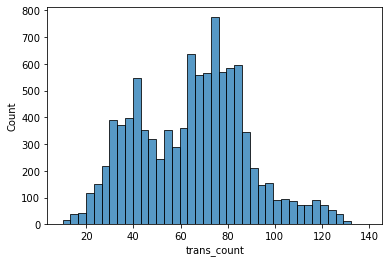

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


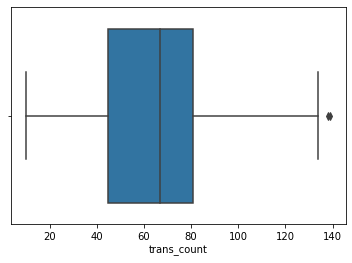

max:  139
min:  10
Mean:  65.10769077505479

IQR STRATEGY ------------
Q1:  45.0
Q2 (median):  67.0
Q3:  81.0
Left whisker:  -9.0
Right whisker:  135.0

QUANTILE STRATEGY ------------
95th percentile:  105.0
5th percentile:  28.0

(IQR Strategy) NUMBER OF OUTLIERS DETECTED IN THE trans_count COLUMN: 2
(Quantile Strategy) NUMBER OF OUTLIERS DETECTED IN trans_count COLUMN: 942


In [123]:
outlier('trans_count')

In [124]:
for i, data in df.iterrows():
    if data['trans_count'] > 135:
        df.at[i, 'trans_count'] = 135

## trans_count_change: change in transaction count Q4 over Q1

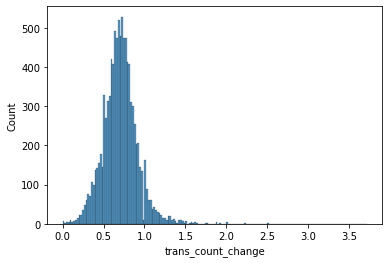

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


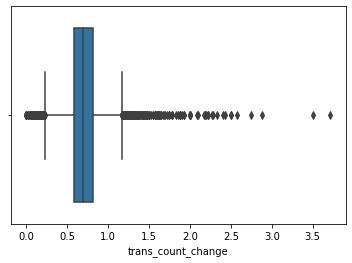

max:  3.714
min:  0.0
Mean:  0.7076987447698735

IQR STRATEGY ------------
Q1:  0.581
Q2 (median):  0.7
Q3:  0.816
Left whisker:  0.22849999999999998
Right whisker:  1.1684999999999999

QUANTILE STRATEGY ------------
95th percentile:  1.053
5th percentile:  0.368

(IQR Strategy) NUMBER OF OUTLIERS DETECTED IN THE trans_count_change COLUMN: 360
(Quantile Strategy) NUMBER OF OUTLIERS DETECTED IN trans_count_change COLUMN: 1000


In [126]:
outlier('trans_count_change')

In [129]:
df[df.trans_count_change > 1.5].trans_count_change.describe()

count    62.000000
mean      1.974097
std       0.441560
min       1.522000
25%       1.638750
50%       1.875000
75%       2.178250
max       3.714000
Name: trans_count_change, dtype: float64

In [133]:
df[df.trans_count_change < 0.23].trans_count_change.describe()

count    96.000000
mean      0.147750
std       0.067064
min       0.000000
25%       0.106500
50%       0.169000
75%       0.201500
max       0.227000
Name: trans_count_change, dtype: float64

In [130]:
df.drop(index = df[df.trans_count_change > 1.5].index, inplace = True)

In [141]:
for i, data in df.iterrows():
    if data['trans_count_change'] > 1.16:
        df.at[i, 'trans_count_change'] = 1.16
    if data['trans_count_change'] < 0.23:
        df.at[i, 'trans_count_change'] = 0.23

## util: average card utilization ratio = rev_bal / credit_limit

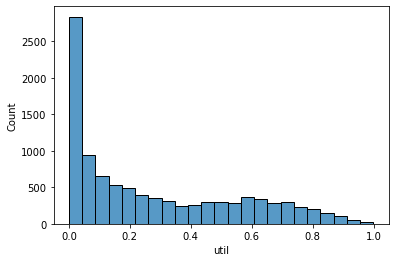

C:\Users\Sarah Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


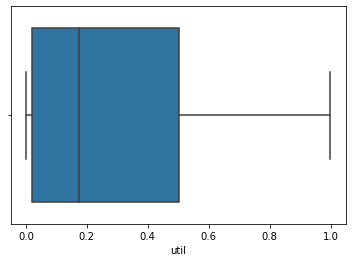

max:  0.9990000000000001
min:  0.0
Mean:  0.2741802325581394

IQR STRATEGY ------------
Q1:  0.02
Q2 (median):  0.175
Q3:  0.501
Left whisker:  -0.7015
Right whisker:  1.2225000000000001

QUANTILE STRATEGY ------------
95th percentile:  0.7922500000000001
5th percentile:  0.0

(IQR Strategy) NUMBER OF OUTLIERS DETECTED IN THE util COLUMN: 0
(Quantile Strategy) NUMBER OF OUTLIERS DETECTED IN util COLUMN: 499


In [143]:
outlier('util')

In [192]:
df.to_csv('df2_outs.csv', index = False)

---------------------------------------------

## Correlation Matrix 

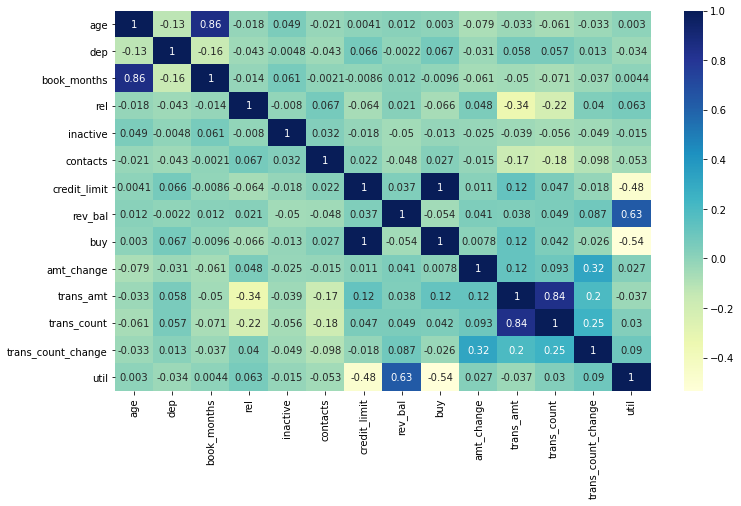

In [322]:
plt.figure(figsize = (12, 7))
sns.heatmap(df[numcols].corr(), cmap = 'YlGnBu', annot = True)
plt.show()

## Multicollinearity:

(Multi-collinearity will not be a problem for certain models. Such as random forest or decision tree. For example, if we have two identical columns, decision tree / random forest will automatically "drop" one column at each split. And the model will still work well.)
- **We note strong correlations between:**
    - book_months and age 
    - buy and credit limit
    - trans_count and trans_amt 
    - util and rev_bal 
    
    
- **We also note the 2 derived features:**
    - 'buy' (open to buy credit line) = credit_limit - rev_bal
    - 'util' (Average card utilization ratio) = rev_bal / credit_limit
    
    
- Variance Inflation Factor: 
    - 1 = no multicollinearity
    - 5 = moderate
    - greater = severe multicollinearity
    
    
- We drop the age column because of its high correlation with book_months. Also, book_months (number of months the customer has been with the bank) is more relevant to our problem as well.
- We drop the credit_limit as well as the rev_bal columns, since they are significantly correlated to the buy and util columns respectively, also, the 2 latter columns have been derived from the 2 former columns.
- We also drop the trans_count column owing to its strong correlation with the trans_amt column 
- **Unnecessary for tree based algorithms however, we can reduce training time by removing irrelevant features**

**Note:** Tree based algorithms are not affected my variance in the data and hence do not necessarily require feature scaling

In [216]:
df = pd.read_csv('df2_outs.csv')
print(df.shape)
df.head()

(9691, 26)


,att,att_l,age,gender,gender_l,dep,edu,edu_l,marital,marital_l,...,inactive,contacts,credit_limit,rev_bal,buy,amt_change,trans_amt,trans_count,trans_count_change,util
0,Existing Customer,1,44,M,1,2,Graduate,4,Married,1,...,1,2,4010.0,1247,2763.0,1.200,1088,24,0.846,0.311
1,Existing Customer,1,48,M,1,2,Graduate,4,Single,2,...,3,3,11656.0,1677,9979.0,1.200,1441,32,0.882,0.144
2,Existing Customer,1,42,M,1,5,Uneducated,1,Unknown,3,...,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
3,Existing Customer,1,65,M,1,1,Unknown,0,Married,1,...,2,3,9095.0,1587,7508.0,1.200,1314,26,1.160,0.174
4,Existing Customer,1,57,F,0,2,Graduate,4,Married,1,...,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279


In [12]:
# since tree based models are not affected by outliers, we will use the version of the dataset prior to outlier mgmnt 
DF = pd.read_csv('df1.csv')
DF.shape

(10127, 26)

In [217]:
tree_df = df.drop(['att', 'age', 'gender', 'edu', 'marital', 'income', 'card', 'credit_limit', 'rev_bal', 'trans_count'], axis = 1)
tree_df.head()
# 4 strongly correlated columns and original categorical variables deleted 
# strongly correlated columns are removed to avoid over fitting 

,att_l,gender_l,dep,edu_l,marital_l,income_l,card_l,book_months,rel,inactive,contacts,buy,amt_change,trans_amt,trans_count_change,util
0,1,1,2,4,1,2,0,36,3,1,2,2763.0,1.200,1088,0.846,0.311
1,1,1,2,4,2,4,0,36,6,3,3,9979.0,1.200,1441,0.882,0.144
2,1,1,5,1,3,5,0,31,5,3,2,5281.0,0.831,1201,0.680,0.217
3,1,1,1,0,1,2,0,53,6,2,3,7508.0,1.200,1314,1.160,0.174
4,1,0,2,4,1,1,0,53,5,2,2,1756.0,1.190,1570,0.611,0.279


In [218]:
X = tree_df.drop('att_l', axis = 1)
y = tree_df['att_l']
X.shape, y.shape

((9691, 15), (9691,))

---------------------------------------------

## Feature Selection

**Three benefits of performing feature selection before modeling your data are:**
- Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
- Improves Accuracy: Less misleading data means modeling accuracy improves.
- Reduces Training Time: Less data means that algorithms train faster.

### Selecting most relevant features using the chi2 method for categorical data and ANOVA f test (f_classif())for continuous data 


- **Hypotheses: Ho - variable has no impact, H1 - variable has significant impact**


- **categorical variables**: gender_l, edu_l, marital_l, income_l, card_l
- **numerical/continuous variable**: book_months, dep, inactive, rel, contacts, buy, amt_change, trans_amt, trans_count_change, util

In [219]:
# feature selection using chi2 for categorical variables
chi_sel = chi2(X[['gender_l', 'edu_l', 'marital_l', 'income_l', 'card_l']], y)
chi_sel
chi_stats = chi_sel[0]
p_values = chi_sel[1]
d = {'chi_stats': list(chi_stats), 'p_values': list(p_values)}
cp = pd.DataFrame(data = d, index = ['gender_l', 'edu_l', 'marital_l', 'income_l', 'card_l'])
cp = cp.sort_values(by = 'p_values', ascending = True)
cp

,chi_stats,p_values
gender_l,5.235615,0.022129
card_l,1.396429,0.237322
income_l,0.958054,0.327678
marital_l,0.917316,0.338181
edu_l,0.786689,0.375103


### At 95% level of siginificance we note that the columns 'gender_l' is the only column that has a sigificant effect on attrition rate

In [220]:
# feature selection using f_classif for continuous/numerical data 
f_sel = f_classif(X[['book_months', 'dep', 'inactive', 'rel', 'contacts', 'buy', 'amt_change', 'trans_amt', 'trans_count_change', 'util']], y)
f_values = f_sel[0]
p_values = f_sel[1]
d = {'f_values': list(f_values), 'p_values': list(p_values)}
fp = pd.DataFrame(data = d, index = ['book_months', 'dep', 'inactive', 'rel', 'contacts', 'buy', 'amt_change', 'trans_amt', 'trans_count_change', 'util'])
fp = fp.sort_values(by = 'p_values', ascending = True)
fp

,f_values,p_values
trans_count_change,1165.468550,2.604247e-241
util,342.304971,3.920260e-75
contacts,341.274755,6.456978e-75
inactive,313.980849,3.633902e-69
trans_amt,296.735970,1.593871e-65
rel,258.045086,2.509124e-57
amt_change,140.154572,4.097706e-32
dep,3.500753,6.137105e-02
book_months,3.455927,6.305569e-02
buy,0.531038,4.661884e-01


### At 95% level of significance we note that the columns 'dep', 'book_months' and 'buy' do not have significant effect on attrition.

In [221]:
# Hence, we remove the variables obtained above that have negligable effect on attritipn (dependent variable)
X_dropped = X.drop(['marital_l', 'card_l', 'edu_l', 'income_l', 'dep', 'buy', 'book_months'], axis = 1)
print(X_dropped.shape)
X_dropped.head()

(9691, 8)


,gender_l,rel,inactive,contacts,amt_change,trans_amt,trans_count_change,util
0,1,3,1,2,1.200,1088,0.846,0.311
1,1,6,3,3,1.200,1441,0.882,0.144
2,1,5,3,2,0.831,1201,0.680,0.217
3,1,6,2,3,1.200,1314,1.160,0.174
4,0,5,2,2,1.190,1570,0.611,0.279


---------------------------------------------

## Dealing with imbalance in our dependent variable using Synthetic Minority Oversampling TEchnique (SMOTE) -- data augmentation
- Models built using imbalanced datasets can result in poor performance and bias in training owing to imbalance in the distribution of dependent variable values.
- One of the simplest approaches to dealing with such data is to 'oversample the minority class'. In our case, the minority class is the number of customers to choose to leave the bank.
- The SMOTE technique creates new records for the minority class derived from existing records, hence this step does not add any new information to the data.

*SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.* -- Page 47, Imbalanced Learning: Foundations, Algorithms, and Applications, 2013.

In [222]:
y.value_counts() # imbalanced target variable

1    8067
0    1624
Name: att_l, dtype: int64

In [223]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_dropped_sm, y_sm = sm.fit_resample(X_dropped, y.ravel())
  
print('Before oversampling X_dropped shape: ', X_dropped.shape)
print('After OverSampling, the shape of X_dropped: {}'.format(X_dropped_sm.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_sm.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_sm == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_sm == 0)))

# new synthetic data records generated for att: 0 = 6443
# updated total number of records: 9691 + 6443 = 16,134  

Before oversampling X_dropped shape:  (9691, 8)
After OverSampling, the shape of X_dropped: (16134, 8)
After OverSampling, the shape of y: (16134,) 

After OverSampling, counts of label '1': 8067
After OverSampling, counts of label '0': 8067


In [224]:
X_dropped_sm.shape, y_sm.shape

((16134, 8), (16134,))

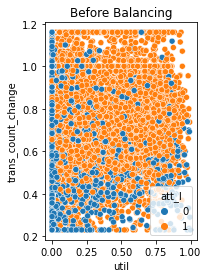

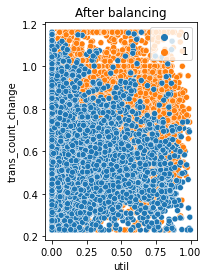

In [225]:
plt.subplot(1, 2, 1)
sns.scatterplot(data = X_dropped, x = 'util', y = 'trans_count_change', hue= y)
plt.title('Before Balancing')
plt.show()

plt.subplot(1, 2, 2)
sns.scatterplot(data = X_dropped_sm, x = 'util', y = 'trans_count_change', hue = y_sm)
plt.title('After balancing')
plt.show()

In [226]:
X_dropped_sm.shape

(16134, 8)

## Train and Test Splits

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X_dropped_sm, y_sm, test_size = 0.2, random_state = 1, shuffle = True)

In [228]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12907, 8), (3227, 8), (12907,), (3227,))

---------------------------------------------

# MODELS: (Tree based algorithms: Decision Tree, Random Forest and Gradient Boosting)

## Decision Tree 1

In [97]:
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X_train, y_train, cv = 10)
scores 

array([0.90859799, 0.92408985, 0.91324555, 0.9186677 , 0.92021689,
       0.92563904, 0.91789311, 0.90775194, 0.91782946, 0.9248062 ])

In [98]:
dt1 = dt.fit(X_train,  y_train)

In [229]:
y_pred_dt1 = dt1.predict(X_test)
print('Roc Auc Score: ', roc_auc_score(y_test, y_pred_dt1))

print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred_dt1))

print('Classification Report: ')
print(classification_report(y_test, y_pred_dt1))

print('Accuracy: ', accuracy_score(y_test, y_pred_dt1))

Roc Auc Score:  0.9189854988956112
Confusion Matrix: 
[[1524  101]
 [ 160 1442]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1625
           1       0.93      0.90      0.92      1602

    accuracy                           0.92      3227
   macro avg       0.92      0.92      0.92      3227
weighted avg       0.92      0.92      0.92      3227

Accuracy:  0.9191199256275178


In [36]:
text_dt1 = tree.export_text(dt1)
print(text_dt1)

|--- feature_5 <= 2941.00
|   |--- feature_0 <= 0.50
|   |   |--- feature_6 <= 0.80
|   |   |   |--- feature_1 <= 5.50
|   |   |   |   |--- feature_4 <= 1.07
|   |   |   |   |   |--- feature_5 <= 1836.50
|   |   |   |   |   |   |--- feature_7 <= 0.15
|   |   |   |   |   |   |   |--- feature_1 <= 3.50
|   |   |   |   |   |   |   |   |--- feature_7 <= 0.08
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 1578.00
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= 1558.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- feature_5 >  1558.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_5 >  1578.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_7 >  0.08
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.76
|   |   |   |   |   |

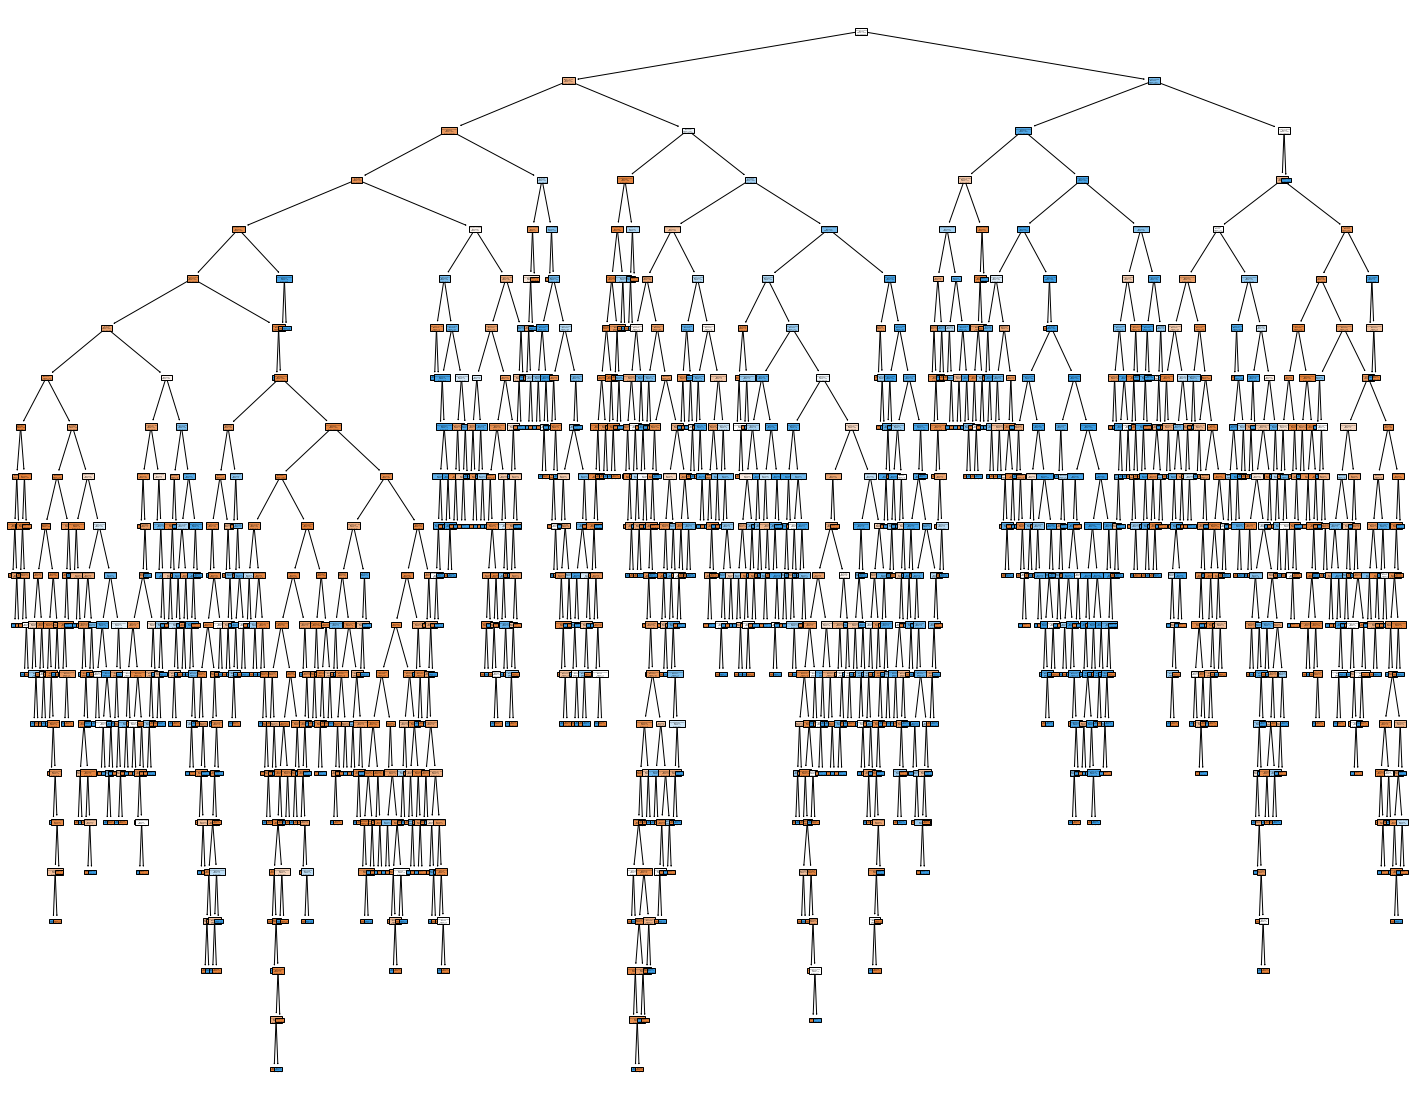

In [182]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt1, 
                   feature_names=X_dropped_sm.columns,  
#                    class_names=.target_names,
                   filled=True)

### Saving and Loading Models 

In [100]:
import pickle
# Save the trained model as a pickle string.
save_dt1 = pickle.dumps(dt1)

# Load the pickled model
load_dt1 = pickle.loads(save_dt1)
  
# Use the loaded pickled model to make predictions
load_dt1.predict(X_test)

result = load_dt1.score(X_test, y_test)
print(result)

0.9191199256275178


--------------------------------------------------------------

## Decision tree 2 with Grid Search CV

In [101]:
dt1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [102]:
param = {"max_features": [1,2,4,6], 
    "max_depth": [1, 3, 5, 9] }

In [103]:
dec = DecisionTreeClassifier()
gs = GridSearchCV(dec, param, cv = 5) # cv: cross validation
gs.fit(X_train, np.ravel(y_train, order = 'C')) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 5, 9],
                         'max_features': [1, 2, 4, 6]})

In [104]:
y_pred = gs.predict(X_test)

print('Roc Auc Score: ', roc_auc_score(y_test, y_pred))

print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

print('Classification Report: ')
print(classification_report(y_test, y_pred))

print('Accuracy: ', accuracy_score(y_test, y_pred))

Roc Auc Score:  0.9050377412849323
Confusion Matrix: 
[[1502  123]
 [ 183 1419]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1625
           1       0.92      0.89      0.90      1602

    accuracy                           0.91      3227
   macro avg       0.91      0.91      0.91      3227
weighted avg       0.91      0.91      0.91      3227

Accuracy:  0.9051750852184691


In [105]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    
    for mean, std, params in zip(mean_score, std_score, params):
        print(f'{round(mean, 3)} + or - {round(std, 3)} for the {params}')
        
display(gs)

Best parameters are: {'max_depth': 9, 'max_features': 6}


0.644 + or - 0.064 for the {'max_depth': 1, 'max_features': 1}
0.672 + or - 0.053 for the {'max_depth': 1, 'max_features': 2}
0.703 + or - 0.037 for the {'max_depth': 1, 'max_features': 4}
0.739 + or - 0.005 for the {'max_depth': 1, 'max_features': 6}
0.723 + or - 0.032 for the {'max_depth': 3, 'max_features': 1}
0.726 + or - 0.024 for the {'max_depth': 3, 'max_features': 2}
0.803 + or - 0.009 for the {'max_depth': 3, 'max_features': 4}
0.802 + or - 0.034 for the {'max_depth': 3, 'max_features': 6}
0.767 + or - 0.016 for the {'max_depth': 5, 'max_features': 1}
0.801 + or - 0.015 for the {'max_depth': 5, 'max_features': 2}
0.852 + or - 0.016 for the {'max_depth': 5, 'max_features': 4}
0.87 + or - 0.005 for the {'max_depth': 5, 'max_features': 6}
0.813 + or - 0.029 for the {'max_depth': 9, 'max_features': 1}
0.864 + or - 0.013 for the {'max_depth': 9, 'max_features': 2}
0.902 + or - 0.005 for the {'max_depth': 9, 'max_features': 

In [173]:
dtt = DecisionTreeClassifier(max_depth = 9, max_features = 6)
scores = cross_val_score(dtt, X_train, y_train, cv = 10)
scores 

array([0.90549961, 0.90859799, 0.90007746, 0.90395043, 0.89465531,
       0.91092177, 0.91324555, 0.90620155, 0.9       , 0.9       ])

In [176]:
dtt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, max_features=6)

In [177]:
y_pred_dtt = dtt.predict(X_test)
print('Roc Auc Score: ', roc_auc_score(y_test, y_pred_dtt))

print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred_dtt))

print('Classification Report: ')
print(classification_report(y_test, y_pred_dtt))

print('Accuracy: ', accuracy_score(y_test, y_pred_dtt))

Roc Auc Score:  0.9106159608182081
Confusion Matrix: 
[[1511  114]
 [ 174 1428]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1625
           1       0.93      0.89      0.91      1602

    accuracy                           0.91      3227
   macro avg       0.91      0.91      0.91      3227
weighted avg       0.91      0.91      0.91      3227

Accuracy:  0.9107530213820886


----------------------

## Random Forest 1 Basic

In [106]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, y_train, cv = 10)
scores 

array([0.93570875, 0.95274981, 0.94500387, 0.94810225, 0.93183579,
       0.95507359, 0.95120062, 0.9379845 , 0.94341085, 0.94651163])

In [107]:
rf0 = rf.fit(X_train, y_train)

In [108]:
y_pred_rf0 = rf0.predict(X_test)

print('Roc Auc Score: ', roc_auc_score(y_test, y_pred_rf0))

print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred_rf0))

print('Classification Report: ')
print(classification_report(y_test, y_pred_rf0))

print('Accuracy: ', accuracy_score(y_test, y_pred_rf0))

Roc Auc Score:  0.9521206184576971
Confusion Matrix: 
[[1583   42]
 [ 112 1490]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1625
           1       0.97      0.93      0.95      1602

    accuracy                           0.95      3227
   macro avg       0.95      0.95      0.95      3227
weighted avg       0.95      0.95      0.95      3227

Accuracy:  0.9522776572668112


In [110]:
save_rf0 = pickle.dumps(rf0)
# load_ref1 = pickle.loads(save_rf1)

In [111]:
rf0.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Random Forest 2 with Grid Search CV

In [112]:
RF = RandomForestClassifier()

In [113]:
# Grid search cv
param = {
    "n_estimators": [50, 100, 150, 200], # number of trees in the forest 
    'max_features': ['auto', 'sqrt', 'log2'], # max features to consider when looking for the best split
    "max_depth": [1, 3, 5, 7, 9], # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves 
                                  # contain less than min_samples_split samples.
    "criterion": ['gini', 'entropy']
}

gscv = GridSearchCV(RF, param, cv = 5)
gscv.fit(X_train, np.ravel(y_train, order = 'C'))

def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    
    for mean, std, params in zip(mean_score, std_score, params):
        print(f'{round(mean, 3)} + or - {round(std, 3)} for the {params}')
        
display(gscv)

# Best parameters are: {'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2', 'n_estimators': 150} -- Latest

Best parameters are: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2', 'n_estimators': 200}


0.78 + or - 0.007 for the {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 50}
0.781 + or - 0.012 for the {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 100}
0.78 + or - 0.009 for the {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 150}
0.783 + or - 0.004 for the {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 200}
0.775 + or - 0.018 for the {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 50}
0.782 + or - 0.009 for the {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 100}
0.784 + or - 0.004 for the {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 150}
0.784 + or - 0.007 for the {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 200}
0.756 + or - 0.

In [120]:
print('Best Score: ', gscv.best_score_)
print('Best params: ', gscv.best_params_)

Best Score:  0.9325169541705444
Best params:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2', 'n_estimators': 200}


In [115]:
y_pred_gscv = gscv.predict(X_test)

print('Roc Auc Score: ', roc_auc_score(y_test, y_pred_gscv))

print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred_gscv))

print('Classification Report: ')
print(classification_report(y_test, y_pred_gscv))

print('Accuracy: ', accuracy_score(y_test, y_pred_gscv))

Roc Auc Score:  0.9351136079900124
Confusion Matrix: 
[[1547   78]
 [ 131 1471]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1625
           1       0.95      0.92      0.93      1602

    accuracy                           0.94      3227
   macro avg       0.94      0.94      0.94      3227
weighted avg       0.94      0.94      0.94      3227

Accuracy:  0.9352339634335296


In [116]:
save_rf1 = pickle.dumps(gscv) # NOTE rf1: gscv
# load_rf2 = pickle.loads(save_rf2)

------------------------------------------

## Gradient Boosting Classifier 1 Basic 

In [117]:
gbc = GradientBoostingClassifier()
scores = cross_val_score(gbc, X_train, y_train, cv = 10)
scores 

array([0.91789311, 0.93338497, 0.92951201, 0.92873741, 0.92021689,
       0.92951201, 0.93106119, 0.91860465, 0.92093023, 0.9255814 ])

In [118]:
gbc0 = gbc.fit(X_train, np.ravel(y_train)) # np.ravel(y_train, order = 'C') 

In [119]:
y_pred_gbc0 = gbc0.predict(X_test)

print('Roc Auc Score: ', roc_auc_score(y_test, y_pred_gbc0))

print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred_gbc0))

print('Classification Report: ')
print(classification_report(y_test, y_pred_gbc0))

print('Accuracy: ', accuracy_score(y_test, y_pred_gbc0))

Roc Auc Score:  0.9292542014789206
Confusion Matrix: 
[[1531   94]
 [ 134 1468]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1625
           1       0.94      0.92      0.93      1602

    accuracy                           0.93      3227
   macro avg       0.93      0.93      0.93      3227
weighted avg       0.93      0.93      0.93      3227

Accuracy:  0.9293461419274869


In [121]:
save_gbc0 = pickle.dumps(gbc0)

## Gradient Boosting Classifier 2 Hyper parameter tuning with grid search cv 

In [69]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [275]:
# Grid search cv
gbc1 = GradientBoostingClassifier()
param = {
    "n_estimators": [50, 100, 150, 200], # number of trees in the forest 
    'max_features': ['auto', 'sqrt', 'log2'], # max features to consider when looking for the best split
    "max_depth": [1, 3, 5, 7, 9], # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves 
                                  # contain less than min_samples_split samples.
    "learning_rate": [0.01, 0.1, 1, 10, 100]
}

gs_gb = GridSearchCV(gbc1, param, cv = 5)
gs_gb.fit(X_train, np.ravel(y_train, order = 'C'))

def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    
    for mean, std, params in zip(mean_score, std_score, params):
        print(f'{round(mean, 3)} + or - {round(std, 3)} for the {params}')
        
display(gs_gb)

-------------------------------------

## MODELS: KNN
Need feature scaling, dummy variables and outlier management

#### KNN 1: Basic model without feature scaling and one hot encoding

In [192]:
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X_train, y_train, cv = 10)
scores

array([0.85515105, 0.84353215, 0.85670023, 0.85670023, 0.84663052,
       0.84817971, 0.8373354 , 0.84573643, 0.85193798, 0.84031008])

In [193]:
knn1 = knn.fit(X_train, y_train)

In [194]:
y_pred_knn1 = knn1.predict(X_test)
print('Roc Auc Score: ', roc_auc_score(y_test, y_pred_knn1))

print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred_knn1))

print('Classification Report: ')
print(classification_report(y_test, y_pred_knn1))

print('Accuracy: ', accuracy_score(y_test, y_pred_knn1))

Roc Auc Score:  0.8602308652645732
Confusion Matrix: 
[[1471  154]
 [ 296 1306]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1625
           1       0.89      0.82      0.85      1602

    accuracy                           0.86      3227
   macro avg       0.86      0.86      0.86      3227
weighted avg       0.86      0.86      0.86      3227

Accuracy:  0.8605515959095135


### Dummy variables for nominal features 

In [195]:
X_train_en = pd.concat([X_train, pd.get_dummies(X_train['gender_l'], prefix = 'gender')], axis = 1)
X_train_en.drop('gender_l', axis = 1, inplace = True)
X_train_en

,rel,inactive,contacts,amt_change,trans_amt,trans_count_change,util,gender_0,gender_1
6764,3,3,2,0.684000,2571,0.419000,0.000000,1,0
6111,6,1,1,0.969000,4674,0.718000,0.558000,1,0
7443,6,4,1,0.796000,4575,0.714000,0.906000,1,0
7154,6,3,1,0.622000,4756,0.735000,0.523000,1,0
10943,2,3,3,0.604947,1865,0.826133,0.161967,1,0
...,...,...,...,...,...,...,...,...,...
16127,5,2,3,0.939355,840,0.802220,0.006848,1,0
5192,6,2,3,0.663000,2473,0.273000,0.000000,1,0
12172,4,3,2,0.670655,2614,0.472273,0.000000,1,0
235,6,3,1,0.657000,1554,0.444000,0.275000,0,1


In [196]:
X_test_en = pd.concat([X_test, pd.get_dummies(X_test['gender_l'], prefix = 'gender')], axis = 1)
X_test_en.drop('gender_l', axis = 1, inplace = True)
X_test_en.head()

,rel,inactive,contacts,amt_change,trans_amt,trans_count_change,util,gender_0,gender_1
533,4,3,3,0.807000,1200,0.895000,0.091000,0,1
7082,3,4,3,0.482000,1592,0.346000,0.000000,0,1
9548,3,3,2,0.859000,8620,0.754000,0.105000,0,1
15011,3,3,2,0.802209,7870,0.770672,0.050951,0,1
9958,5,2,3,0.572385,2398,0.674731,0.000000,0,1


### Feature Scaling 

In [197]:
X_train_en.head()

,rel,inactive,contacts,amt_change,trans_amt,trans_count_change,util,gender_0,gender_1
6764,3,3,2,0.684000,2571,0.419000,0.000000,1,0
6111,6,1,1,0.969000,4674,0.718000,0.558000,1,0
7443,6,4,1,0.796000,4575,0.714000,0.906000,1,0
7154,6,3,1,0.622000,4756,0.735000,0.523000,1,0
10943,2,3,3,0.604947,1865,0.826133,0.161967,1,0


In [198]:
X_train.columns

Index(['gender_l', 'rel', 'inactive', 'contacts', 'amt_change', 'trans_amt',
       'trans_count_change', 'util'],
      dtype='object')

### The data is too large for shapiro test, so using D’Agostino’s K^2 Test

In [199]:
from scipy.stats import normaltest 
for column in ['rel', 'inactive', 'contacts', 'amt_change', 'trans_amt','trans_count_change', 'util']:
    stat, p = normaltest(X_train[column])
    print(stat, ":", p)

    # Interpret if gaussian then go for standard scaler else we choose between std or min max scalers
    # if p value < 0.05 (los) => data not Gaussian

    if p> 0.05:
        print('Sample seems Gaussian (fail to reject Ho)')
    else:
        print('Sample does not seem Gaussian (reject Ho)')

3176.731971964158 : 0.0
Sample does not seem Gaussian (reject Ho)
682.0050346333286 : 8.025801500242478e-149
Sample does not seem Gaussian (reject Ho)
903.1248041666213 : 7.743557726011796e-197
Sample does not seem Gaussian (reject Ho)
51.68731573615174 : 5.973680567163472e-12
Sample does not seem Gaussian (reject Ho)
1777.792832079774 : 0.0
Sample does not seem Gaussian (reject Ho)
151.40306150764835 : 1.3281371415732908e-33
Sample does not seem Gaussian (reject Ho)
1551.0721312053158 : 0.0
Sample does not seem Gaussian (reject Ho)


In [200]:
sc = StandardScaler()
mm = MinMaxScaler()
for column in ['rel', 'inactive', 'contacts', 'amt_change', 'trans_amt','trans_count_change', 'util']:
    col_sc = sc.fit((np.asarray(X_train_en[column]).reshape(-1, 1)))# note for scaling we need array and we need to reshape
    X_train_en[f'{column}_sc'] = col_sc.transform(X_train_en[column].values.reshape(-1, 1))
    X_test_en[f'{column}_sc'] = col_sc.transform(X_test_en[column].values.reshape(-1, 1))
    
    col_mm = mm.fit((np.asarray(X_train_en[column]).reshape(-1, 1)))
    X_train_en[f'{column}_mm'] = col_mm.transform(X_train_en[column].values.reshape(-1, 1))
    X_test_en[f'{column}_mm'] = col_mm.transform(X_test_en[column].values.reshape(-1, 1))

In [201]:
X_train = X_train_en[['gender_0', 'gender_1', 'rel_sc',
       'inactive_sc', 'contacts_sc', 'amt_change_sc', 'trans_amt_sc',
       'trans_count_change_sc', 'util_sc']]
X_test = X_test_en[['gender_0', 'gender_1', 'rel_sc',
       'inactive_sc', 'contacts_sc', 'amt_change_sc', 'trans_amt_sc',
       'trans_count_change_sc', 'util_sc']]

### KNN 2: includes dummy variables and standard scaler 

In [202]:
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X_train, y_train, cv = 10)
scores 

array([0.88303641, 0.89697909, 0.88845856, 0.90317583, 0.8721921 ,
       0.883811  , 0.89465531, 0.88992248, 0.89612403, 0.89302326])

In [203]:
knn2 = knn.fit(X_train, y_train)

In [205]:
y_pred_knn2 = knn2.predict(X_test)
print('Roc Auc Score: ', roc_auc_score(y_test, y_pred_knn2))

print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred_knn2))

print('Classification Report: ')
print(classification_report(y_test, y_pred_knn2))

print('Accuracy: ', accuracy_score(y_test, y_pred_knn2))

Roc Auc Score:  0.8894455008162873
Confusion Matrix: 
[[1499  126]
 [ 230 1372]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1625
           1       0.92      0.86      0.89      1602

    accuracy                           0.89      3227
   macro avg       0.89      0.89      0.89      3227
weighted avg       0.89      0.89      0.89      3227

Accuracy:  0.889680818097304


### KNN 3: with MinMaxScaler

In [206]:
X_train = X_train_en[['gender_0', 'gender_1', 'rel_mm',
       'inactive_mm', 'contacts_mm', 'amt_change_mm', 'trans_amt_mm',
       'trans_count_change_mm', 'util_mm']]
X_test = X_test_en[['gender_0', 'gender_1', 'rel_mm',
       'inactive_mm', 'contacts_mm', 'amt_change_mm', 'trans_amt_mm',
       'trans_count_change_mm', 'util_mm']]

In [207]:
knn3 = knn.fit(X_train, y_train)

In [208]:
y_pred_knn3 = knn3.predict(X_test)
print('Roc Auc Score: ', roc_auc_score(y_test, y_pred_knn3))

print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred_knn3))

print('Classification Report: ')
print(classification_report(y_test, y_pred_knn3))

print('Accuracy: ', accuracy_score(y_test, y_pred_knn3))

Roc Auc Score:  0.8882103140305387
Confusion Matrix: 
[[1496  129]
 [ 231 1371]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1625
           1       0.91      0.86      0.88      1602

    accuracy                           0.89      3227
   macro avg       0.89      0.89      0.89      3227
weighted avg       0.89      0.89      0.89      3227

Accuracy:  0.8884412767276108


**We note that the KNN model behaves equally well for both scalers. However, we see the improvement in accuracy due to one hot encoding and feature scaling. The accuracy score seems to have improved from approximately 86% to 89%.**

### KNN 4: GridSearch CV to find the best value of K

In [163]:
X_train.shape

(12907, 9)

In [164]:
# We try the model with the conventionally accepted best value of k: square root of the test size ( ~ 113)
knn_ = KNeighborsClassifier(n_neighbors = 113)
knn40 = knn_.fit(X_train, y_train)

In [165]:
y_pred_knn40 = knn40.predict(X_test)

In [166]:
result = confusion_matrix(y_test, y_pred)
print(result)
result2 = accuracy_score(y_test, y_pred)
print(result2)

[[1502  123]
 [ 183 1419]]
0.9051750852184691


In [167]:
print(roc_auc_score(y_test, y_pred))

0.9050377412849323


In [168]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [169]:
# grid search to find the best value of k
parameters = {'n_neighbors' : [5, 10, 50, 100]}
grid = GridSearchCV(knn, parameters, cv=10, scoring='accuracy')
kgscv = grid.fit(X_train, y_train)

In [170]:
grid.best_params_

{'n_neighbors': 5}

In [171]:
grid.best_score_

0.8871942307807782

In [209]:
knn = KNeighborsClassifier(n_neighbors=5)
print(cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy').mean())

0.8871942307807782


## Model Evaluation, Comparison and Conclusion

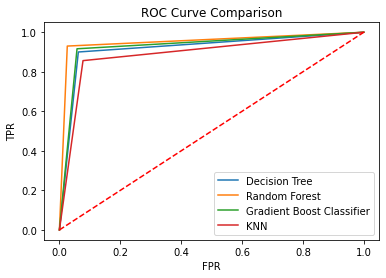

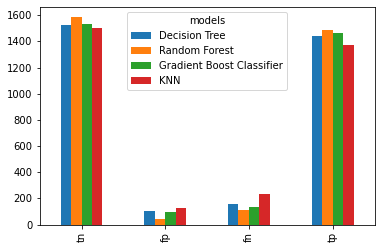

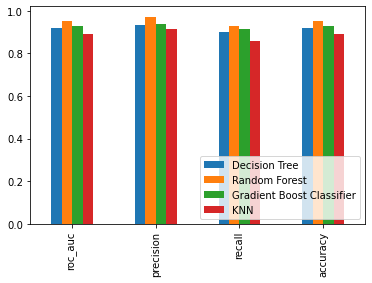

,roc_auc,tn,fp,fn,tp,precision,recall,accuracy
models,,,,,,,,
Decision Tree,0.918985,1524.0,101.0,160.0,1442.0,0.934543,0.900125,0.919120
Random Forest,0.952121,1583.0,42.0,112.0,1490.0,0.972585,0.930087,0.952278
Gradient Boost Classifier,0.929254,1531.0,94.0,134.0,1468.0,0.939821,0.916355,0.929346
KNN,0.889446,1499.0,126.0,230.0,1372.0,0.915888,0.856429,0.889681


In [273]:
# considering the best version of the models 

comparison = pd.DataFrame()
# comparison.set_index(['Decision Tree', 'Random Forest', 'Gradient Boosting', 'K Nearest Neighbors'])
c = 0

for y_pred in [y_pred_dt1, y_pred_rf0, y_pred_gbc0, y_pred_knn2]:
    
#     y_pred = model.predict(X_test)
    
    roc_auc = roc_auc_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    acc = accuracy_score(y_test, y_pred)
    
    comparison.at[c, 'roc_auc'] = roc_auc
    comparison.at[c, 'tn'] = tn
    comparison.at[c, 'fp'] = fp
    comparison.at[c, 'fn'] = fn
    comparison.at[c, 'tp'] = tp
    comparison.at[c, 'precision'] = precision
    comparison.at[c, 'recall'] = recall
    comparison.at[c, 'accuracy'] = acc
    
    c = c+1 

comparison['models'] = ['Decision Tree', 'Random Forest', 'Gradient Boost Classifier', 'KNN']
comparison.set_index('models', inplace = True)

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt1)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf0)
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test, y_pred_gbc0)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn2)



plt.plot(fpr_dt, tpr_dt, label = 'Decision Tree'%roc_auc_score(y_test, y_pred))
plt.plot(fpr_rf, tpr_rf, label = 'Random Forest'%roc_auc_score(y_test, y_pred))
plt.plot(fpr_gbc, tpr_gbc, label = 'Gradient Boost Classifier'%roc_auc_score(y_test, y_pred))
plt.plot(fpr_knn, tpr_knn, label = 'KNN'%roc_auc_score(y_test, y_pred))
plt.plot([0,1], [0,1], 'r--')
plt.legend(loc = 'lower right')  
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve Comparison')


comparison.transpose().loc[['tn', 'fp', 'fn', 'tp']].plot(kind = 'bar')


comparison.transpose().loc[['roc_auc', 'precision', 'recall', 'accuracy']].plot(kind = 'bar')
plt.legend(loc = 'lower right')
plt.show()


comparison

### The ROC (Reciever Operating Characteristic) Curve 
- The curve is obtained by plotting the true positive rate (tpr) on the y-axis and the false positive rate (fpr) on the x-axis
- It is known for its display of how well binary classifiers perform under different threshold settings and allows us to compare the performance of various classification models against each other.
- Hence this curve is a good way of comparing and to eventually choosing the best classifier to model our binary classification problem of predicting customer attrition behaviour.
- The more the area under the curve, the better the model is said to be.

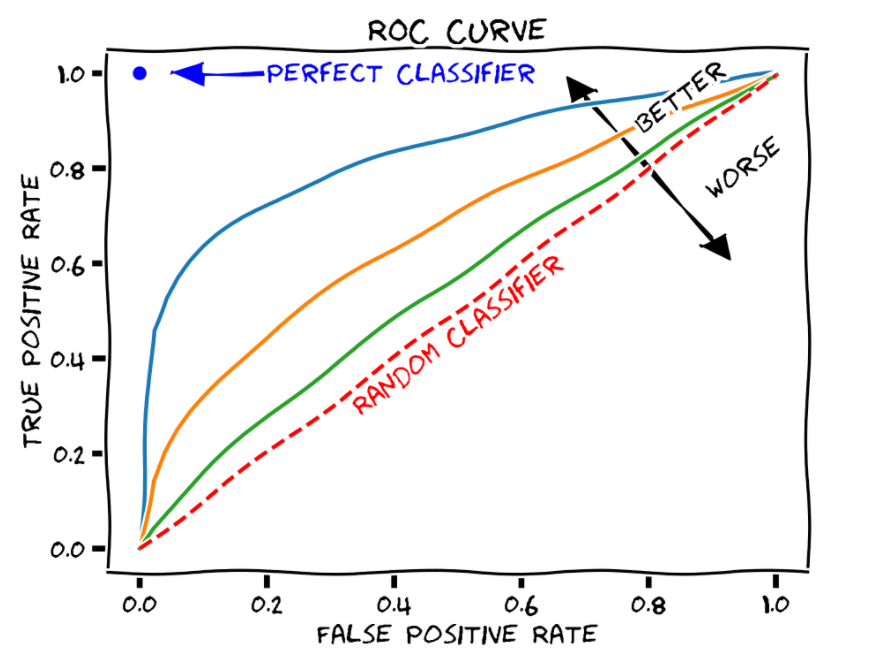

In [284]:
from IPython.display import Image
Image('Screenshot (533).png', width = 500, height = 500)

# img source: https://en.wikipedia.org/wiki/Receiver_operating_characteristic

## Insights and Conclusions

### Confusion Matrix, Type 1 and Type 2 Errors
- The confusion matrix records the number of true positives, false positives (type 1 error), true negatives and false negatives (type 2 errors) and hence gives a clear indication about how well the model performs.
- While in most cases type 1 errors are considered more serious, however, in our case false negatives, that is, incorrectly predicting that a customer will not leave the bank is a more serious error. This is because such a false prediction would fail to warn the bank and would keep them from pursuing preventive measues. 
- Whereas, the type 1 error also has its down sides, here a false positive implies incorrectly predicting that a customer will leave the bank. In such cases, the bank will need to look into the customer and pursue possibly unecessary preventive measures, which might lead to loss of time and resources. 
- **Precision:** = tp / (tp + fp) [higher the value, lower the number of false positives]
- **Recall** = tp / (tp + fn) [higher the value, lower the number of false negatives] 
- **Since, in our case we seek to minimise the number of false negatives, hence we try to ensure a high recall value. Amongst our models, the random forest appears to have the highest recall value, although the precision is even higher.**

### Accuracy = (tp+tn)/(tp+tn+fp+fn)
- Since we have balanced out the dataset, accuracy is a good evaluation metric. Again, the closer the accuracy value is to 1, the better the model performs.

### Model insights:
- **Tree Based Models:** 
    - Decision trees and random forests are used for both regression as well as classification tasks. Since, our problem consists of predicting one out of 2 (finite) possible outcomes viz. the customer leaves or the customer does not leave, hence ours is a binary classification model.
    - One of the most popular advantages of using tree based algorithms is their immunity towards outliers and variation in the data. Hence these algorithms do not necessarily need outlier treatment and feature scaling. **Since our data does have a significant number of outliers, tree based algorithms can help avoid going through the time consuming outlier handling process.**
    - Our data consists of both continuous as well as categorical data however, trees can handle qualitative variables without the need to create dummy variables. 
    - **Since random forests and gradient boost are both ensemble methods, that use multiple decision trees, they prevent overfitting as well as have a greater acccuracy as is seen in our case.**
    
    
- **K Nearest Neighbour Classifier**
    - The algorithm has its foundation on calculating distances between input point and training points and choosing K closest points to classifiy the input point.
    - There are different kinds of distance formulas this algorithm can use such as the Euclidean distance, Manhatten distance etc. **However, it is clear that this algorithm can be computationally expensive when dealing with large datasets, as in our case.** The larger the dataset, the more is the time and cost of its implementation, and hence its degraded peformance.
    - **Again, since this algorithm involves computing distances between points, dimensionality reduction and feature scaling are necessary. In addition, the KNN classifier is highly sensitive to outliers and missing values, thus making it completely necessary to carry out all these preprocessing steps.**
    - The most important step this algorithm involves is to identify the best value of k. This involves various trial and error runs or using a hyper parameter tuning technique such as grid search cv, thus further adding to the heavy computation it involves.
    - All the above factors may have had an important role to play in its less impressive performance in our use case. 
    - **We learn that KNN might not be the best algorithm for data that is big in size or dimension or that has significant nummber of missing values and/or outliers (as in our case).**
    

### Conclusion
Having considered various evaluation metrics and the ROC curve, we can conclude that the random forest is the best model for our data amongst other explored models to study and predict customer churn behaviour. Hence, a random forest can help the bank predict which customers might consider leaving the bank. With such information, the bank can proactively prevent the customer from leaving by addressing the issues the customers might be facing.

### References

- https://machinelearningmastery.com/feature-selection-machine-learning-python/
- https://towardsdatascience.com/mistakes-in-applying-univariate-feature-selection-methods-34c43ce8b93d

- SMOTE oversampling technique for imbalanced datasets: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

- Imbalanced datasets:
    - https://machinelearningmastery.com/what-is-imbalanced-classification/
    - https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis#Oversampling_techniques_for_classification_problems
    - https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
    - https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html
    

- https://analyticsindiamag.com/7-types-classification-algorithms/
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
- https://scikit-learn.org/stable/modules/tree.html
- revolving balance: https://www.creditcards.com/credit-card-news/glossary/term-revolvingbalance/#:~:text=In%20credit%20card%20terms%2C%20a,borrowed%20and%20the%20amount%20repaid.

- comparing models: https://www.kaggle.com/klaudiajankowska/binary-classification-multiple-method-comparison?scriptVersionId=35642967
- normality tests: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
- random forest documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html